# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#loading  Data set
vehdf=pd.read_csv('vehicle.csv')

In [3]:
# Display the first five of datase
vehdf.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
le=LabelEncoder()
columns=vehdf.columns
print(columns)
vehdf['class']=le.fit_transform(vehdf['class']) # label encode class variable

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


# Exploratory data analysis
#*Finding missing values
#*finding outliers
#*Understanding attributed using Descriptive statistics
#*Visualising attribute distribution using univariate and multivariate analysis
#*Finding attribute Correlation and analyzing which attribute is more important

In [5]:
# Check number of columns and rows in data frame
vehdf.shape

(846, 19)

In [6]:
# meta info about the data
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [ ]:
#observations:
#1. we can see that compactness, max.length_aspect_ratio, max.length_rectangularity, hallow_ratio and class have no null values, rest of all features have null values.
#2. All attributes are of numerical type.

# Finding the missing values and treat the missing values

In [7]:
from sklearn.impute import SimpleImputer
newdf=vehdf.copy()
X=newdf.iloc[:,0:19]
imputer=SimpleImputer(missing_values=np.nan, strategy='median',verbose=1)
transformed_values=imputer.fit_transform(X)# filling missing values with mean column values
column=X.columns
print(column)
newdf=pd.DataFrame(transformed_values, columns=column)
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.977541  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

In [8]:
print('original null value count:',)
print(vehdf.isnull().sum())
print('\n\ncount after imputing to nan value:',)
print(newdf.isnull().sum())

original null value count:
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


count after imputing to nan value:
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0

In [ ]:
# we can observe that all missing values are replaced with mode values

In [9]:
#Descriptive staistical summary
newdf.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

In [ ]:
# Observations:
# compactness, circularity features mean and median are almost similar, we can say that these two are normally distributed
#scatter ratio seems to be having some kind of skewness and outlier

In [10]:
newdf.shape

(846, 19)

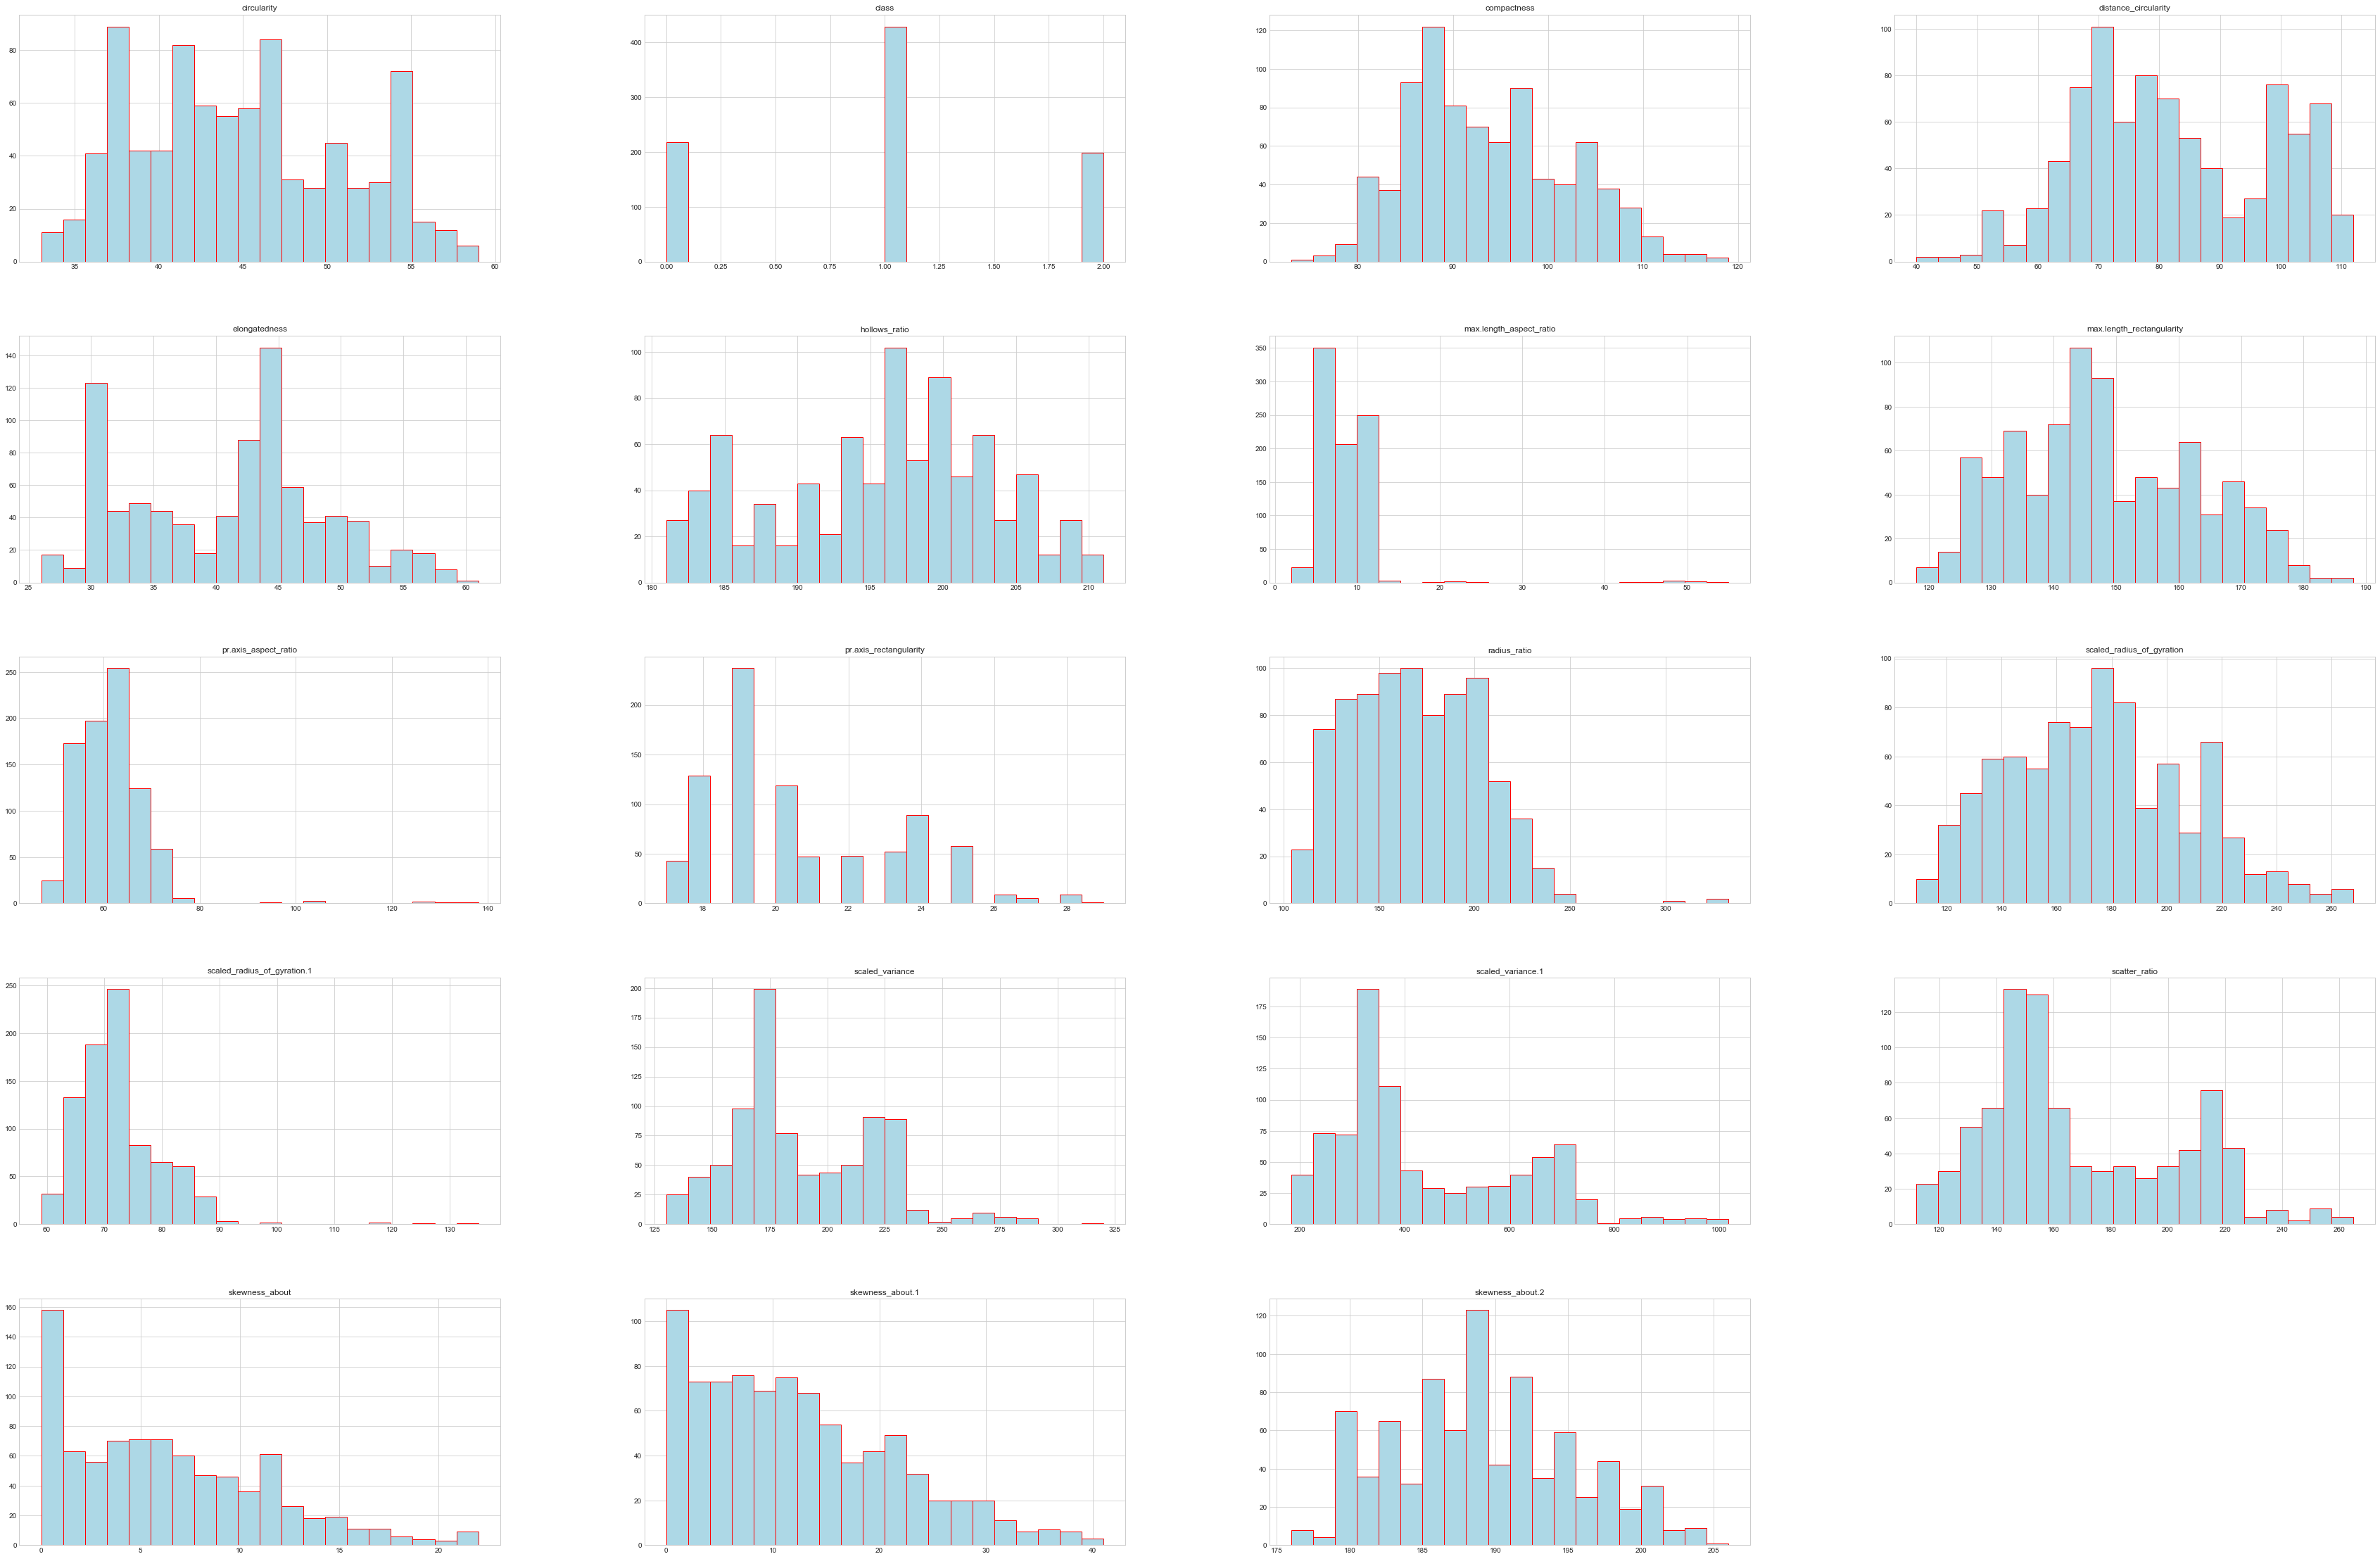

In [11]:
plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor='red')
           
plt.show()

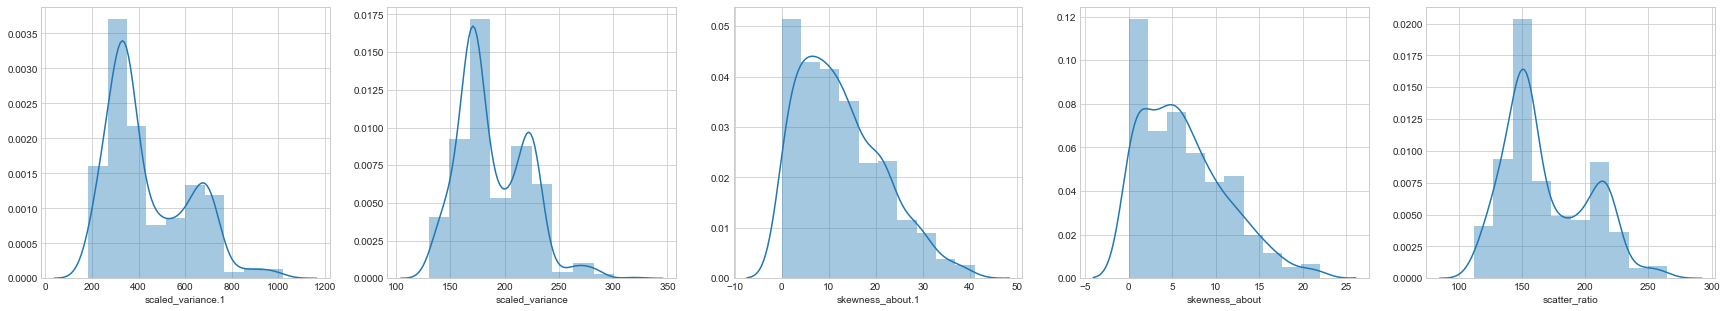

In [12]:
f, ax=plt.subplots(1,5, figsize=(30,5))
vis1=sns.distplot(newdf['scaled_variance.1'], bins=10, ax=ax[0])
vis2=sns.distplot(newdf['scaled_variance'], bins=10, ax=ax[1]) 
vis3=sns.distplot(newdf['skewness_about.1'], bins=10, ax=ax[2])
vis4=sns.distplot(newdf['skewness_about'], bins=10, ax=ax[3]) 
vis5=sns.distplot(newdf['scatter_ratio'], bins=10, ax=ax[4])

f.savefig('subplot.png')

In [13]:
skewValue=newdf.skew()
print('skewvalue of dataframe attributes:',)
print(skewValue)

skewvalue of dataframe attributes:
compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


In [14]:
# Observations:
# most of the attributes are normally distributed
# Scaled variance1, skewness 1 and 2,scatter_ratio seems to be right skwed
# pr.axis_rectangularity seems to be having some outliers.

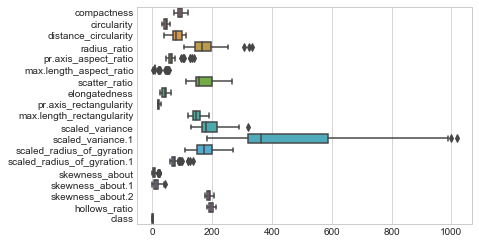

In [15]:
#Univariate analysis using boxplot
ax=sns.boxplot(data=newdf, orient='h')

In [ ]:
# from the above plotting we can see that few features are having outliers

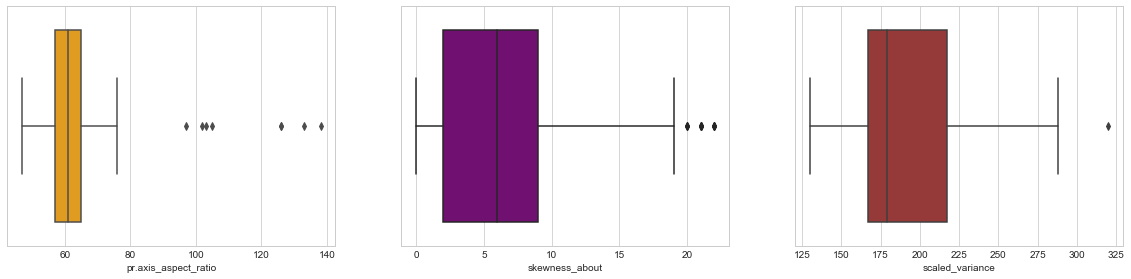

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=newdf['pr.axis_aspect_ratio'], color='orange')
            
plt.subplot(3,3,2)
sns.boxplot(x=newdf['skewness_about'], color='purple')
            
plt.subplot(3,3,3)
sns.boxplot(x=newdf['scaled_variance'], color='brown')
            
plt.show()

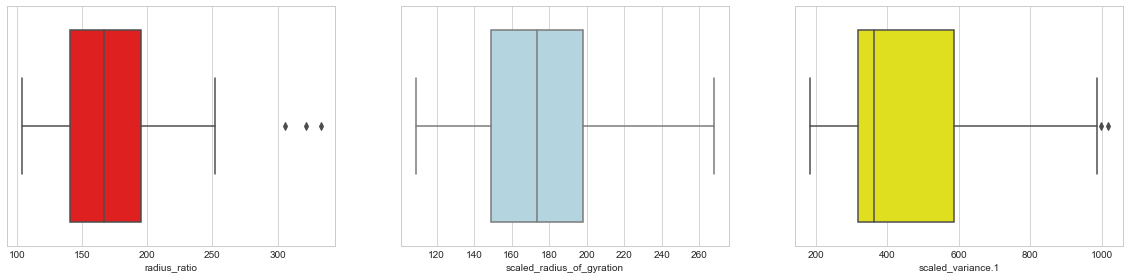

In [17]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=newdf['radius_ratio'], color='red')
            
plt.subplot(3,3,2)
sns.boxplot(x=newdf['scaled_radius_of_gyration'], color='lightblue')
            
plt.subplot(3,3,3)
sns.boxplot(x=newdf['scaled_variance.1'], color='yellow')
            
plt.show()

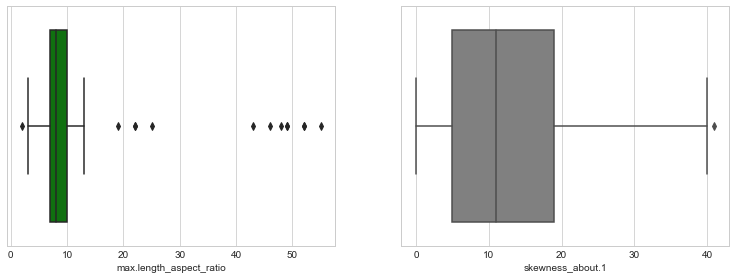

In [18]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.boxplot(x=newdf['max.length_aspect_ratio'], color='green')
            
plt.subplot(3,3,2)
sns.boxplot(x=newdf['skewness_about.1'], color='grey')

plt.show()         

In [ ]:
# observation on boxplots:
# pr.axis_aspect_ratio,skewness_about,max.length_aspect_ratio,radius_ratio,skewness_about have outliers.

# Treating outliers using IQR: Upper whisker

In [19]:
from scipy.stats import iqr
Q1=newdf.quantile(0.25)
Q3=newdf.quantile(0.75)
IQR=Q3-Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [20]:
cleandf=newdf[~((newdf<(Q1-1.5*IQR))|(newdf>(Q3+1.5*IQR))).any(axis=1)]
cleandf.shape

(813, 19)

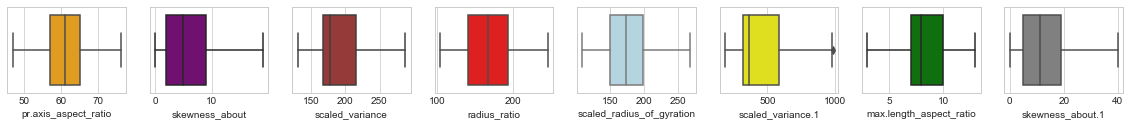

In [21]:
#plotting the box plot to see if outliers are removed
plt.figure(figsize=(20,15))

plt.subplot(8,8,1)
sns.boxplot(x=cleandf['pr.axis_aspect_ratio'], color='orange')
            
plt.subplot(8,8,2)
sns.boxplot(x=cleandf['skewness_about'], color='purple')
            
plt.subplot(8,8,3)
sns.boxplot(x=cleandf['scaled_variance'], color='brown')

plt.subplot(8,8,4)
sns.boxplot(x=cleandf['radius_ratio'], color='red')
            
plt.subplot(8,8,5)
sns.boxplot(x=cleandf['scaled_radius_of_gyration'], color='lightblue')
            
plt.subplot(8,8,6)
sns.boxplot(x=cleandf['scaled_variance.1'], color='yellow')

plt.subplot(8,8,7)
sns.boxplot(x=cleandf['max.length_aspect_ratio'], color='green')
            
plt.subplot(8,8,8)
sns.boxplot(x=cleandf['skewness_about.1'], color='grey')

plt.show()         

In [ ]:
# in the above box plotting we can see that there are no outliers

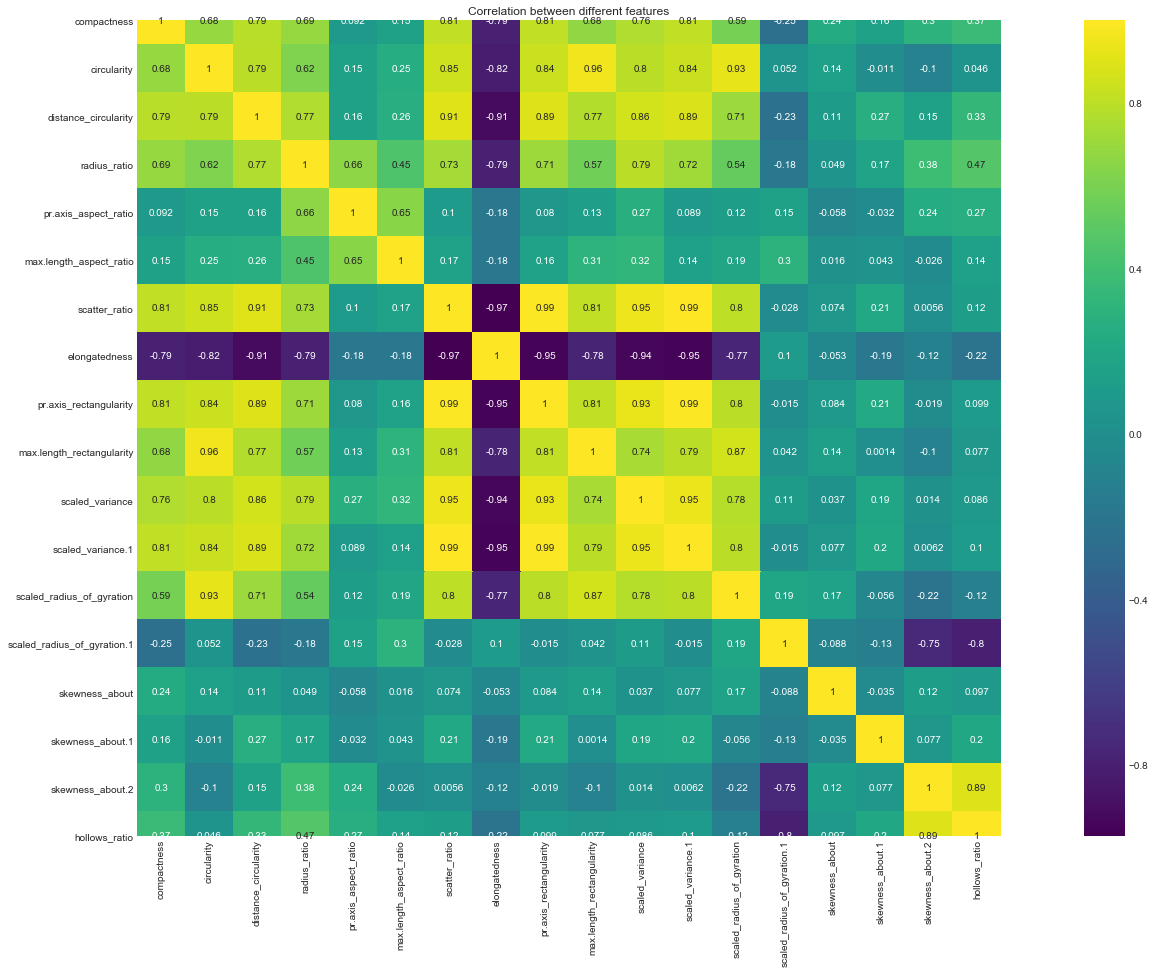

In [22]:
# Heatmap to check the correlation among the different features
def correlation_heatmap(dataframe,l,w):
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True, cmap='viridis')
    plt.title('Correlation between different features')
    plt.show();
    
cleandf=newdf.drop('class', axis=1)

correlation_heatmap(cleandf,30,15)

In [ ]:
#Observations:
# 'scaled_variance', 'scaled_variance.1' seems to be strongly correlated
# skewness_about.2', 'hollows_ratio', seems to be strongly correlated
# distance_circularity', 'radius_ratio' seems to have high positive correlation
#pr.axis_rectangularity', 'max.length_rectangularity' are strongly correlated
# 'scatter_ratio',elongatedness', seems to have strong negative correlation
# elongatedness', 'pr.axis_rectangularity' have strong negative correlation
# 'skewness_about', 'skewness_about.1', are not correlated
# 'skewness_about.1','skewness_about.2' are not correlated

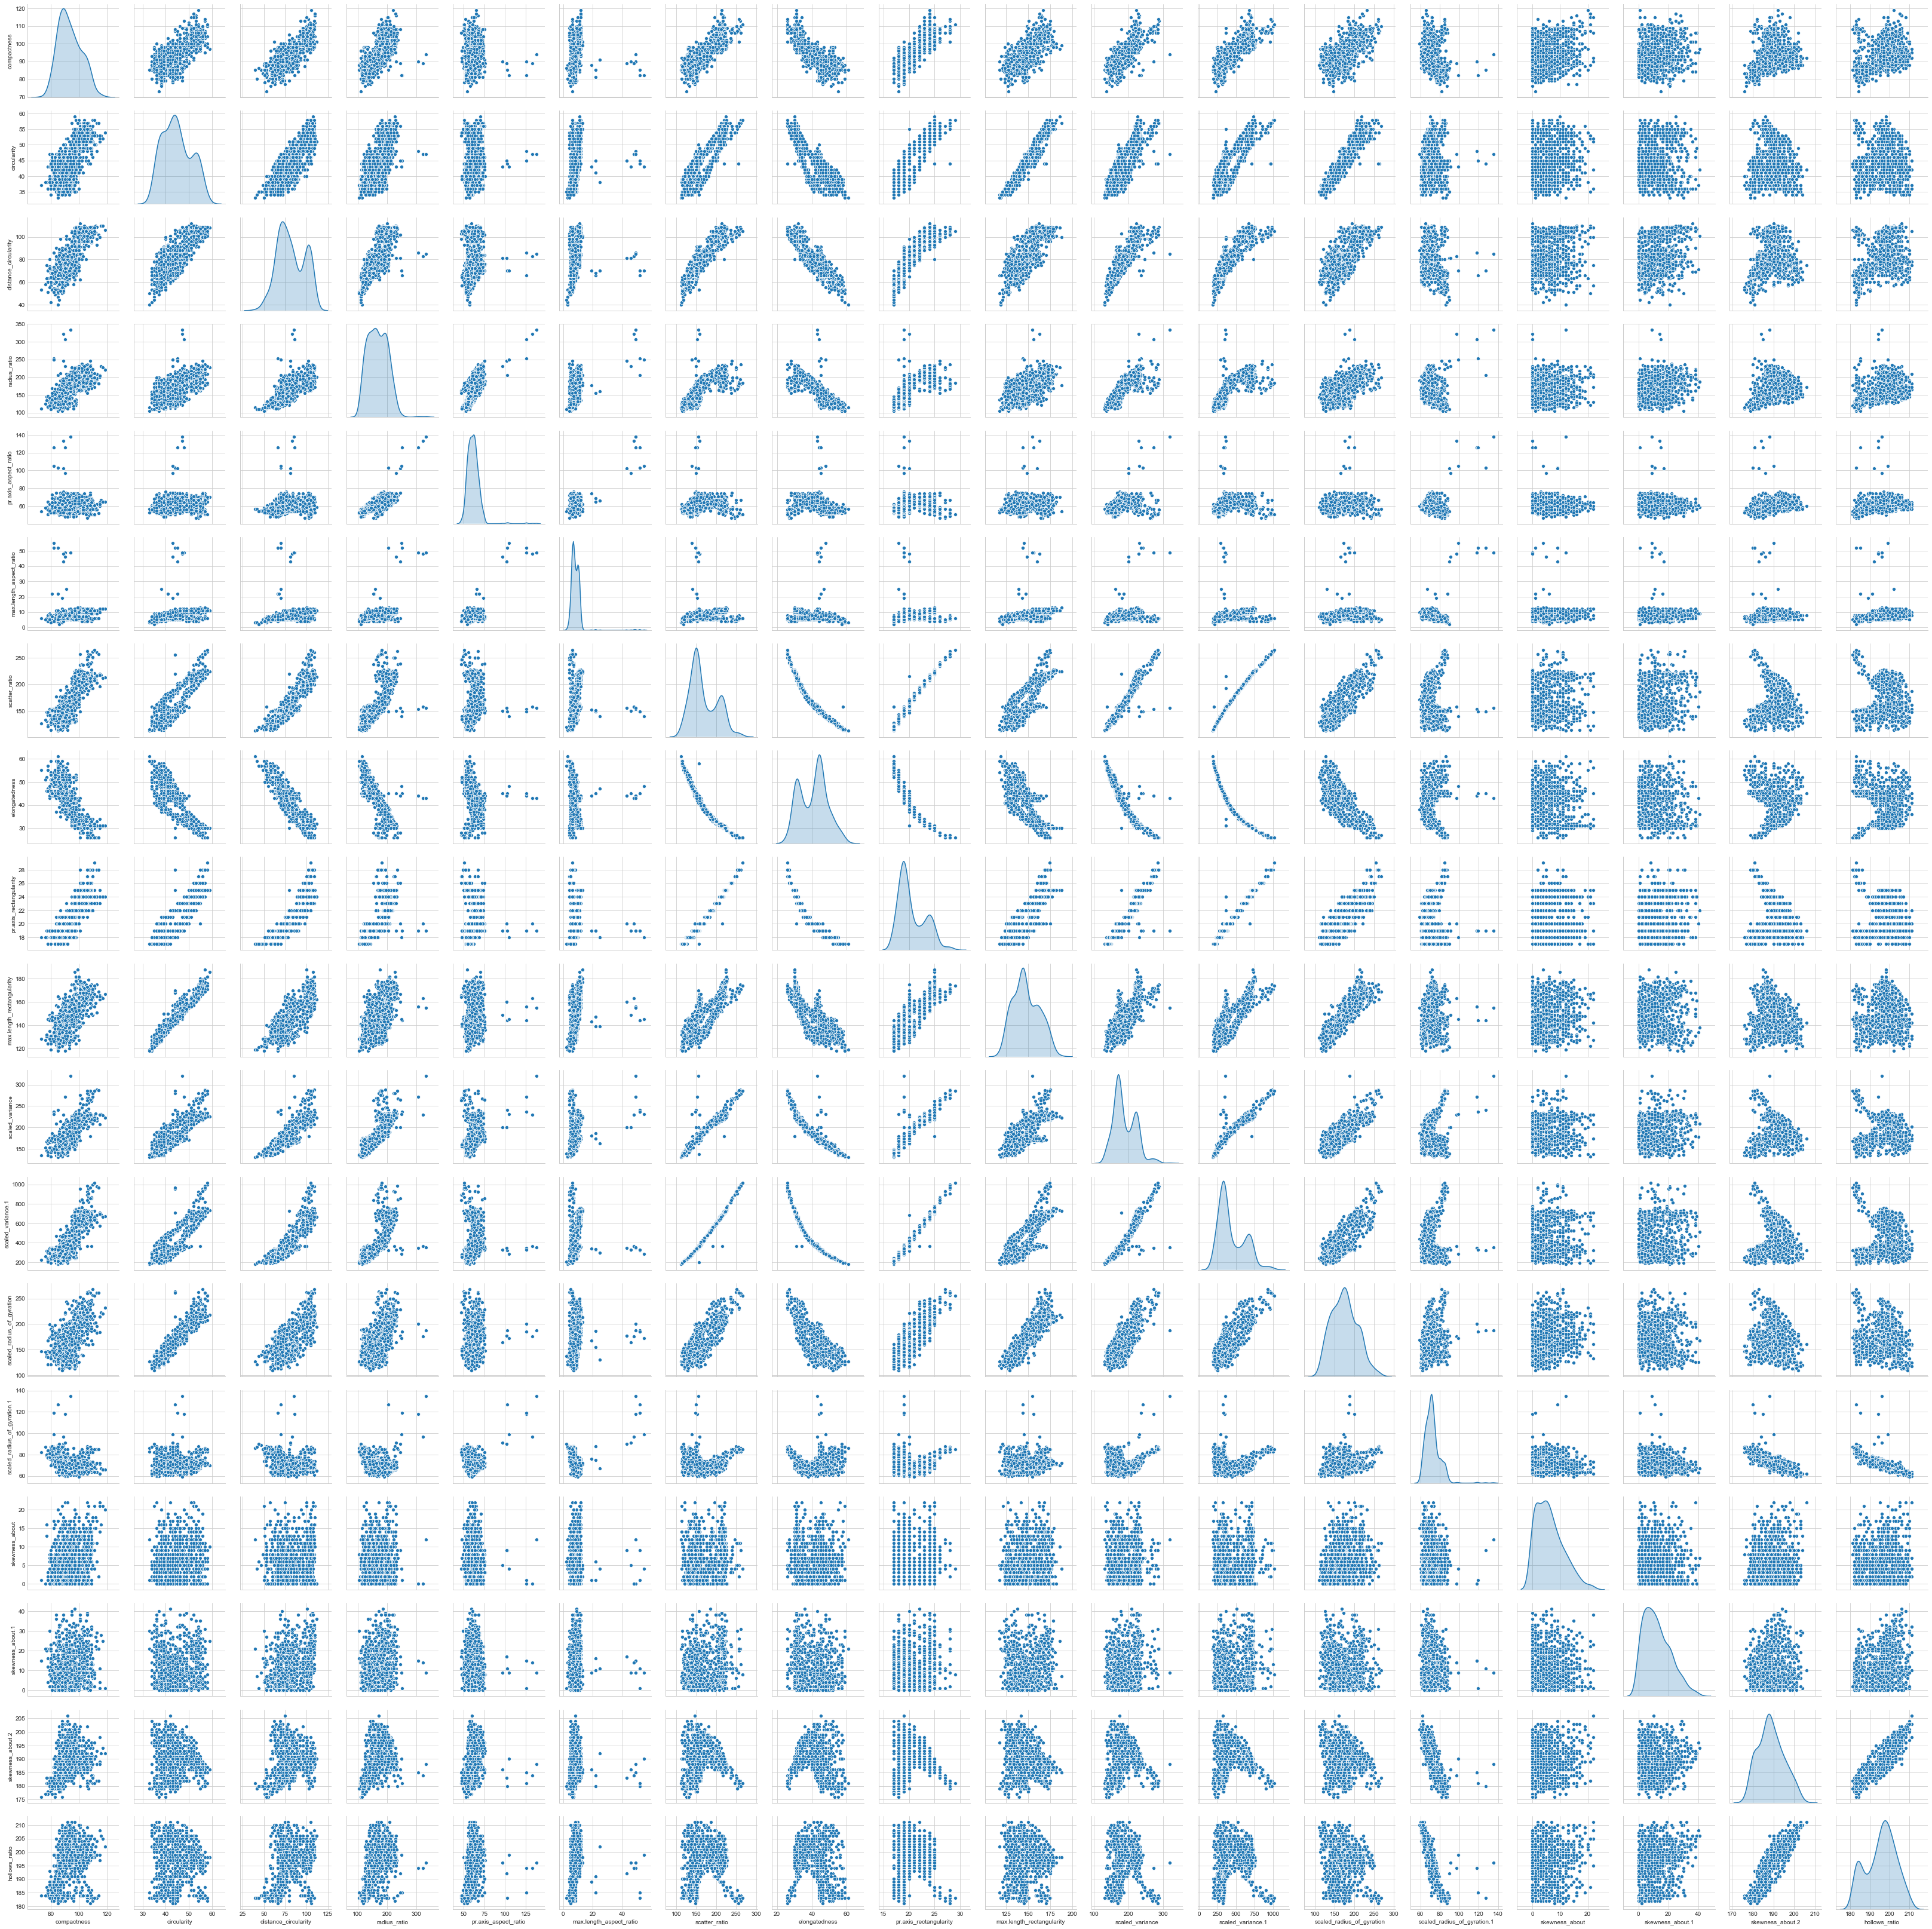

In [23]:
# pairplot Analysis
sns.pairplot(cleandf,diag_kind='kde') 

In [ ]:
# From the above pairplot analysis we can see that, 'scaled_variance'& 'scaled_variance.1' and 'elongatedness'&'pr.axis_rectangularity' 
 are strongly correlated so we can drop them before building a model
# we can say that there are many features which are correlated with each other.. so we can get rid the feature whose correlation
is +_0.9 or above.
# there are 8 such columns
# max.length_rectangularit
# scaled_radius_of_gyration
# skewness_about.2
# scatter_ratio',
# 'elongatedness'
# pr.axis_rectangularity
# 'scaled_variance',
#'scaled_variance.1

there is better approach called PCA to reduce the features

In [ ]:
# We will perform PCA in the following steps
1. split the data into train and test data set
2. normalize the training set using standard scaler
3. calculate the covariance matrix
4. calculated the eigenvectors and their eigenvalues
5. sort the eigenvectors according to their eigenvalues
6. Choose the first K eigenvectors
7. Build new dataset with reduced dimensionality

In [26]:
# seperate the data into independant and dependant variable
X=newdf.iloc[:,0:18]
y=newdf.iloc[:,18]

In [27]:
# Scaling the independant dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [28]:
# calculate the covariance matrix
cov_matrix=np.cov(X_std.T)
print("cov_matrix shape:", cov_matrix.shape)
print("covariance_matrix:", "\n",cov_matrix)

cov_matrix shape: (18, 18)
covariance_matrix: 
 [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.0011834

In [29]:
#finding eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01  1.19922479e-01 -7.83843562e-02
  -6.95178336e-02  1.44875476e-01  4.51862331e-01  5.66136785e-01
   4.84418105e-01  2.60076393e-01 -4.65342885e-02  1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01  2.48205467e-02 -1.87337408e-01
   8.50649539e-02 -3.02731148e-01 -2.49103387e-01  1.79851809e-01
   1.41569001e-02 -9.80779086e-02 -3.01323693e-03 -2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02  5.60143254e-02  7.12008427e-02
  -4.06645651e-02 -1.38405773e-01  7.40350569e-02 -4.34748988e-01
   1.67572478e-01  2.05031597e-01 -7.06489498e-01  3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01 -2.75074211e-01  4.26053415e-02
   4.61473714e-02  

In [30]:
# sort eigenvalues in descending order
eig_pairs=[(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)
eigvalues_sorted=[eig_pairs[index][0] for index in range (len(eigenvalues))]
eigvector_sorted=[eig_pairs[index][1] for index in range (len(eigenvalues))]
print("Eigen values in descending order:\n%s" % eigvalues_sorted)

[(9.404602609088705, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.014922058524633, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389657, array([ 0.11992248,  0.02482055,  0.05601433, -0.27507421, -0.64201297,
       -0.5918013 ,  0.09762831, -0.05764844,  0.10951242,  0.0170642 ,
       -0.05632398,  0.10884073,  0.03146365, -0.28627701,  0.11567935,
        0.07528289, -0.00873592, -0.03952427])), (1.1799374684450215, array([-0.07838436, -0.18733741,  0.07120084,  0.04260534, -0.03272571,
       -0.03141473,  0.09574857, -0.0822902 ,  0.0

In [31]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


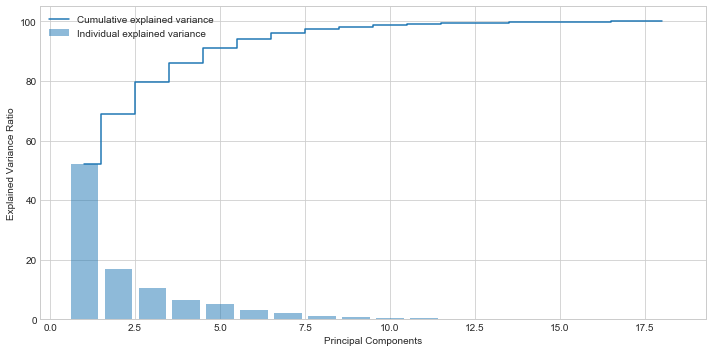

In [32]:
# plotiing the explained variance and principle components
plt.figure(figsize=(10 , 5))
plt.bar(range(1, 19), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, 19), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# from the above plot clearly we can say that 8 dimension() are able to explain 95% variance of data
# so we will use first 8 components going forward and calculate the reduced dimensions

In [33]:
# Dimensionaly reduction
P_reduce=np.array(eigvector_sorted[0:8])
X_std_8D=np.dot(X_std, P_reduce.T)
reduced_pca=pd.DataFrame(X_std_8D)
reduced_pca

0         1          2         3         4         5         6  \
0    0.334162  0.219026  -1.001584 -0.176612 -0.079301 -0.757447 -0.901124   
1   -1.591711  0.420603   0.369034 -0.233234 -0.693949 -0.517162  0.378637   
2    3.769324 -0.195283  -0.087859 -1.202212 -0.731732  0.705041 -0.034584   
3   -1.738598  2.829692  -0.109456 -0.376685  0.362897 -0.484431  0.470753   
4    0.558103 -4.758422 -11.703647 -0.147464 -3.256953 -0.203446  2.671578   
..        ...       ...        ...       ...       ...       ...       ...   
841 -0.442648  0.605884  -0.197213  1.444958 -1.065425  0.820179 -0.041563   
842 -0.314956 -0.164511  -0.794573  0.908272  0.235492 -1.438257 -0.599113   
843  4.809174  0.001249  -0.532333 -0.295652  1.344236 -0.217070  0.573249   
844 -3.294092  1.008276   0.357003  1.933675 -0.042768 -0.402491 -0.202406   
845 -4.765053 -0.334900   0.568136  1.224807  0.054051 -0.335637  0.058098   

            7  
0    0.381106  
1   -0.247059  
2   -0.482772  
3    0.023086  
4    0.448854  
..        ...  
841 -0.506991  
842  0.153086  
843 -0.110478  
844 -0.320622  
845  0.248035  

[846 rows x 8 columns]

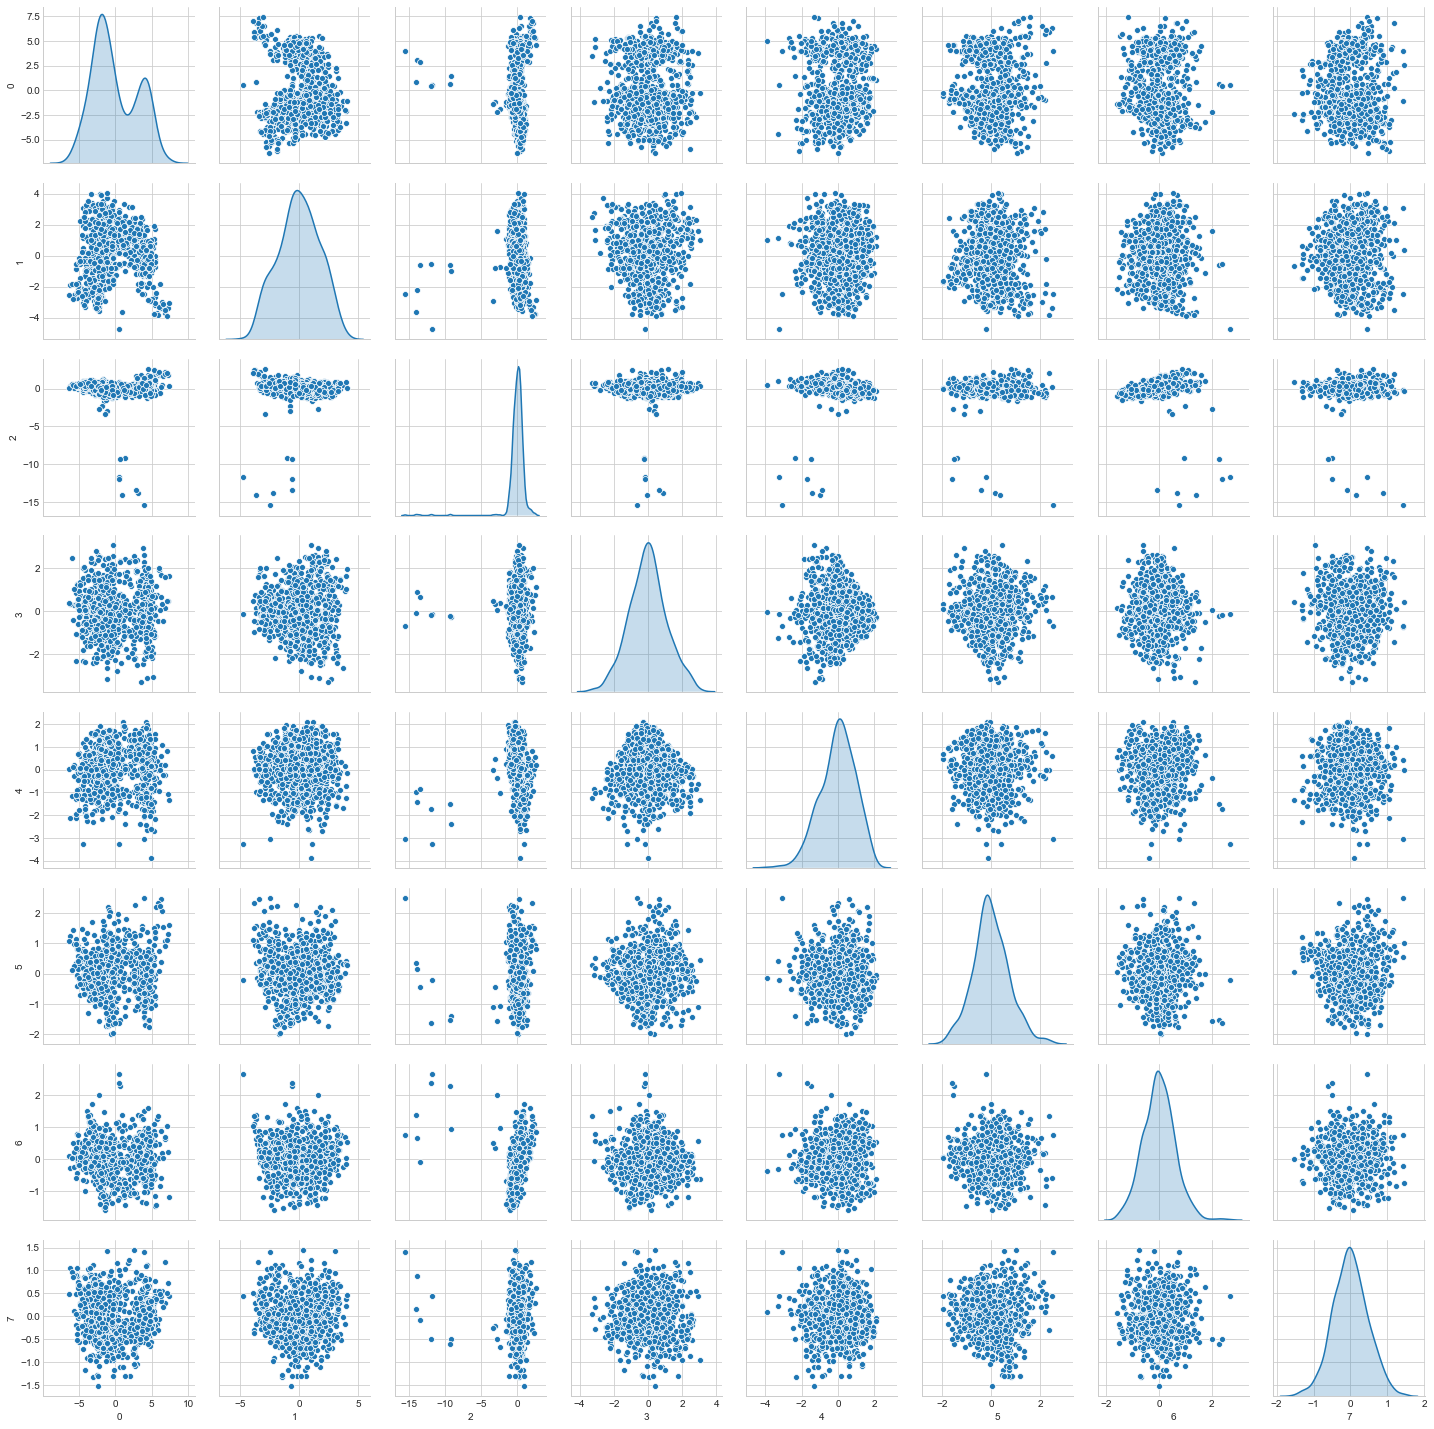

In [34]:
# pairplot after PCA
sns.pairplot(reduced_pca,diag_kind='kde')

In [35]:
#split the original data into train and test data set
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test=train_test_split(X_std, y, test_size=0.3, random_state=1)

# K-fold model on original data

In [36]:
from sklearn import model_selection  
model_selection.KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
kf = model_selection.KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X_std,y):
    M=LogisticRegression()
    M.fit(Orig_X_train,Orig_y_train)
    Y_predict=M.predict(Orig_X_test)
    acc.append(metrics.accuracy_score(Orig_y_test,Y_predict))
    print(metrics.confusion_matrix(Orig_y_test,Y_predict))
    print(metrics.classification_report(Orig_y_test, Y_predict))
    
print("cross-validated score:{0:2f}".format(np.mean(acc)))


[[ 54   3   2]
 [  3 128   2]
 [  2   4  56]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        59
         1.0       0.95      0.96      0.96       133
         2.0       0.93      0.90      0.92        62

    accuracy                           0.94       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254

[[ 54   3   2]
 [  3 128   2]
 [  2   4  56]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        59
         1.0       0.95      0.96      0.96       133
         2.0       0.93      0.90      0.92        62

    accuracy                           0.94       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254

[[ 54   3   2]
 [  3 128   2]
 [  2   4  56]]
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92  

# SVM Model on original data

In [37]:
svc=SVC()
svc.fit(Orig_X_train,Orig_y_train)
Orig_Y_predict=svc.predict(Orig_X_test)

SVC=accuracy_score(Orig_y_test,Orig_Y_predict)
print("Model accuracy on original data:", SVC)


Model accuracy on original data: 0.952755905511811


Confusion Matrix for: 
 Original Data Set 
 [[ 58   0   1]
 [  1 129   3]
 [  6   1  55]]


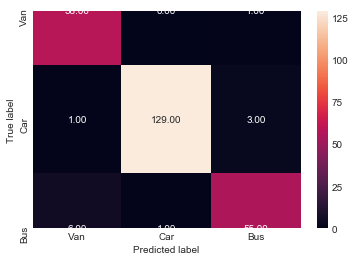

Classification report for raw data: 
               precision    recall  f1-score   support

         0.0       0.89      0.98      0.94        59
         1.0       0.99      0.97      0.98       133
         2.0       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



In [38]:
def draw_confmatrix(y_test,yhat,str1,str2,str3, datatype):
    cm=confusion_matrix(y_test,yhat,[0,1,2])
    print("Confusion Matrix for:", "\n", datatype,  "\n", cm)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[str1,str2,str3], yticklabels=[str1,str2,str3])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

draw_confmatrix(Orig_y_test,Orig_Y_predict,"Van","Car", "Bus", "Original Data Set")
    
print("Classification report for raw data:", "\n", classification_report(Orig_y_test,Orig_Y_predict))

In [ ]:
observations on SVC classification report for original data:
# our model has 89% precision score to classify van,99% precision for car, 93% precisionfor Bus
# In terms of recall score our model has recall score of 98% for van classification, 97% for car and 89% for Bus classification
# our model has weighted average of 95% for al classification metrics

In [39]:
# split the reduced PCA data
pca_X_train,pca_X_test,pca_y_train,pca_y_test=train_test_split(reduced_pca, y, test_size=0.3, random_state=1)

# K fold model on PCA data

In [40]:
kf = model_selection.KFold(n_splits=3,shuffle=True,random_state=2)
acc1=[]
for train,test in kf.split(reduced_pca,y):
    M=LogisticRegression()
    M.fit(pca_X_train,pca_y_train)
    pca_Y_predict=M.predict(pca_X_test)
    acc1.append(metrics.accuracy_score(pca_y_test,pca_Y_predict))
    print(metrics.confusion_matrix(pca_y_test,pca_Y_predict))
    print(metrics.classification_report(pca_y_test, pca_Y_predict))
    
print("cross-validated score:{0:2f}".format(np.mean(acc1)))
    

[[ 44  12   3]
 [ 10 118   5]
 [  3  13  46]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76        59
         1.0       0.83      0.89      0.86       133
         2.0       0.85      0.74      0.79        62

    accuracy                           0.82       254
   macro avg       0.82      0.79      0.80       254
weighted avg       0.82      0.82      0.82       254

[[ 44  12   3]
 [ 10 118   5]
 [  3  13  46]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76        59
         1.0       0.83      0.89      0.86       133
         2.0       0.85      0.74      0.79        62

    accuracy                           0.82       254
   macro avg       0.82      0.79      0.80       254
weighted avg       0.82      0.82      0.82       254

[[ 44  12   3]
 [ 10 118   5]
 [  3  13  46]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76  

#  SVC model on PCA data

In [43]:
svc.fit(pca_X_train,pca_y_train)
pca_Y_predict=svc.predict(pca_X_test)

SVC1=accuracy_score(pca_y_test,pca_Y_predict)
print("Model accuracy on reduced dimensional data:", SVC1)

Model accuracy on reduced dimensional data: 0.9330708661417323


Confusion Matrix for: 
 For reduced dimensions using PCA 
 [[ 57   2   0]
 [  2 126   5]
 [  1   7  54]]


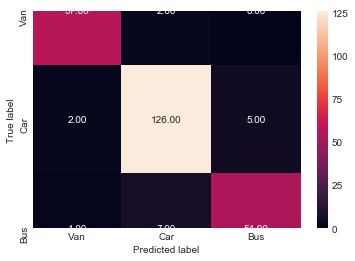

Classification report for reduced Data: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        59
         1.0       0.93      0.95      0.94       133
         2.0       0.92      0.87      0.89        62

    accuracy                           0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [44]:
def draw_confmatrix(y_test,yhat,str1,str2,str3, datatype):
    cm=confusion_matrix(y_test,yhat,[0,1,2])
    print("Confusion Matrix for:", "\n", datatype, "\n", cm)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[str1,str2,str3], yticklabels=[str1,str2,str3])
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

draw_confmatrix(pca_y_test,pca_Y_predict,"Van","Car", "Bus", "For reduced dimensions using PCA")
    
print("Classification report for reduced Data:", "\n", classification_report(pca_y_test,pca_Y_predict))

In [ ]:
observations on classification report for reduced PCA data:
# our model has 95% precision score to classify van,93% precision for car, 92% precisionfor Bus
# In terms of recall score our model has recall score of 97% for van classification, 95% for car and 87% for Bus classification
# our model has weighted average of 93% for al classification metrics

In [45]:
Accuracy = {'Accuary on original data': SVC, 'Accuracy on reduced dimensional data': SVC1}
print (Accuracy)

{'Accuary on original data': 0.952755905511811, 'Accuracy on reduced dimensional data': 0.9330708661417323}


In [ ]:
# Observations:
# on original data set SVC model accuracy is 95%
# on original data set KFold cross validated score is 93.7%
# on PCA data set SVC model accuracy is 93%
# on PCA data set KFold cross validation score is 81.8%